In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
covid = pd.read_csv('/content/covid_19_data.csv')
covid #to check data

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [4]:
covid.describe() #to see the data

,Confirmed,Deaths,Recovered
count,321.000000,321.000000,321.000000
mean,9949.800623,709.152648,3030.277259
std,31923.853086,3236.162817,14364.870365
min,0.000000,0.000000,0.000000
25%,104.000000,2.000000,2.000000
50%,653.000000,12.000000,73.000000
75%,4655.000000,144.000000,587.000000
max,299691.000000,27682.000000,132929.000000


In [5]:
covid.head() #to see what the data looks like (firsst five)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [6]:
covid.tail() #to see what the data looks like (last five)

,Date,State,Region,Confirmed,Deaths,Recovered
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181
320,4/29/2020,Zhejiang,Mainland China,1268,1,1263


In [7]:
covid.shape #to know the  umber of rows and columns

(321, 6)

In [10]:
covid.columns #to check the title of all coloumn headers

Index(['Date', 'State', 'Region', 'Confirmed', 'Deaths', 'Recovered'], dtype='object')

In [16]:
covid.info() #to check for missing values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       321 non-null    datetime64[ns]
 1   State      140 non-null    object        
 2   Region     321 non-null    object        
 3   Confirmed  321 non-null    int64         
 4   Deaths     321 non-null    int64         
 5   Recovered  321 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 15.2+ KB


In [26]:
covid.isnull().sum() #to count how many of each cooloumn has missing valuec

,0
Date,0
State,181
Region,0
Confirmed,0
Deaths,0
Recovered,0


In [13]:
len(covid)

321

In [14]:
(covid.isnull().sum() / len(covid))*100 #to check the percentage of missing data

,0
Date,0.000000
State,56.386293
Region,0.000000
Confirmed,0.000000
Deaths,0.000000
Recovered,0.000000


In [15]:
covid["Date"] = pd.to_datetime(covid["Date"]) #converting the data to its actual data type

In [32]:
#grouping data by countries to check for confirmed, death and recovered cases
countries = covid.groupby(['Region'])[['Confirmed', 'Deaths', 'Recovered']].sum()
countries

,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702
Andorra,743,42,423
Angola,27,2,7
...,...,...,...
West Bank and Gaza,344,2,71
Western Sahara,6,0,5
Yemen,6,0,1


In [47]:
#to check for top 20 countries with most confirmed cases
countries.sort_values(by='Confirmed',ascending=False).head(10)

,Confirmed,Deaths,Recovered
Region,,,
US,1039909,60967,120720
Spain,236899,24275,132929
Italy,203591,27682,71252
France,166543,24121,49118
UK,166441,26166,857
Germany,161539,6467,120400
Turkey,117589,3081,44040
Russia,99399,972,10286
Iran,93657,5957,73791


/tmp/ipython-input-1024795469.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Confirmed', y='Region', data=countries.sort_values(by='Confirmed', ascending=False).head(10).reset_index(), palette='viridis')


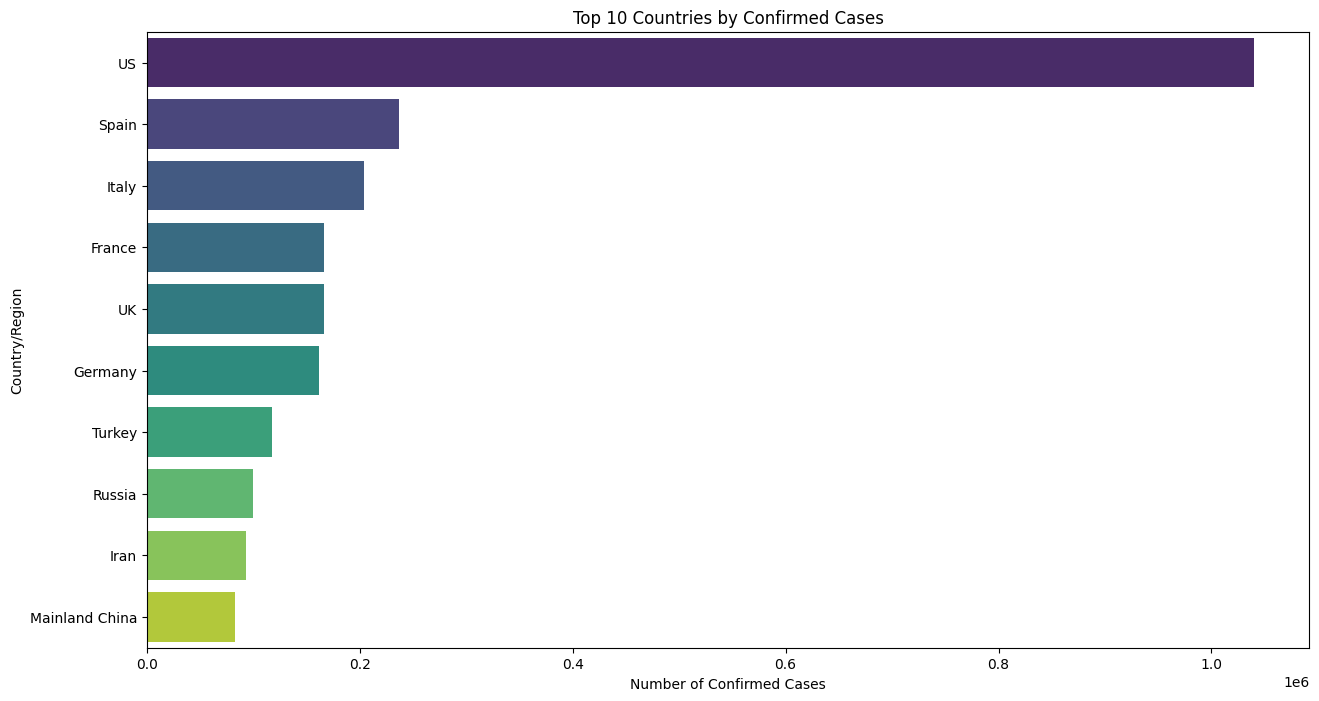

In [48]:
# Plotting the top 10 countries with most confirmed cases
plt.figure(figsize=(15, 8))
sns.barplot(x='Confirmed', y='Region', data=countries.sort_values(by='Confirmed', ascending=False).head(10).reset_index(), palette='viridis')
plt.title('Top 10 Countries by Confirmed Cases')
plt.xlabel('Number of Confirmed Cases')
plt.ylabel('Country/Region')
plt.show()

This bar plot shows the top 10 countries with the highest number of confirmed COVID-19 cases. We can clearly see the countries most affected by the pandemic according to this dataset.

In [54]:
#to check for top 10 countries with most recovered cases
countries.sort_values(by='Recovered',ascending=False).head(10)

,Confirmed,Deaths,Recovered
Region,,,
Spain,236899,24275,132929
US,1039909,60967,120720
Germany,161539,6467,120400
Mainland China,82862,4633,77610
Iran,93657,5957,73791
Italy,203591,27682,71252
France,166543,24121,49118
Turkey,117589,3081,44040
Brazil,79685,5513,34132


/tmp/ipython-input-3498708774.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Recovered', y='Region', data=countries.sort_values(by='Recovered', ascending=False).head(10).reset_index(), palette='viridis')


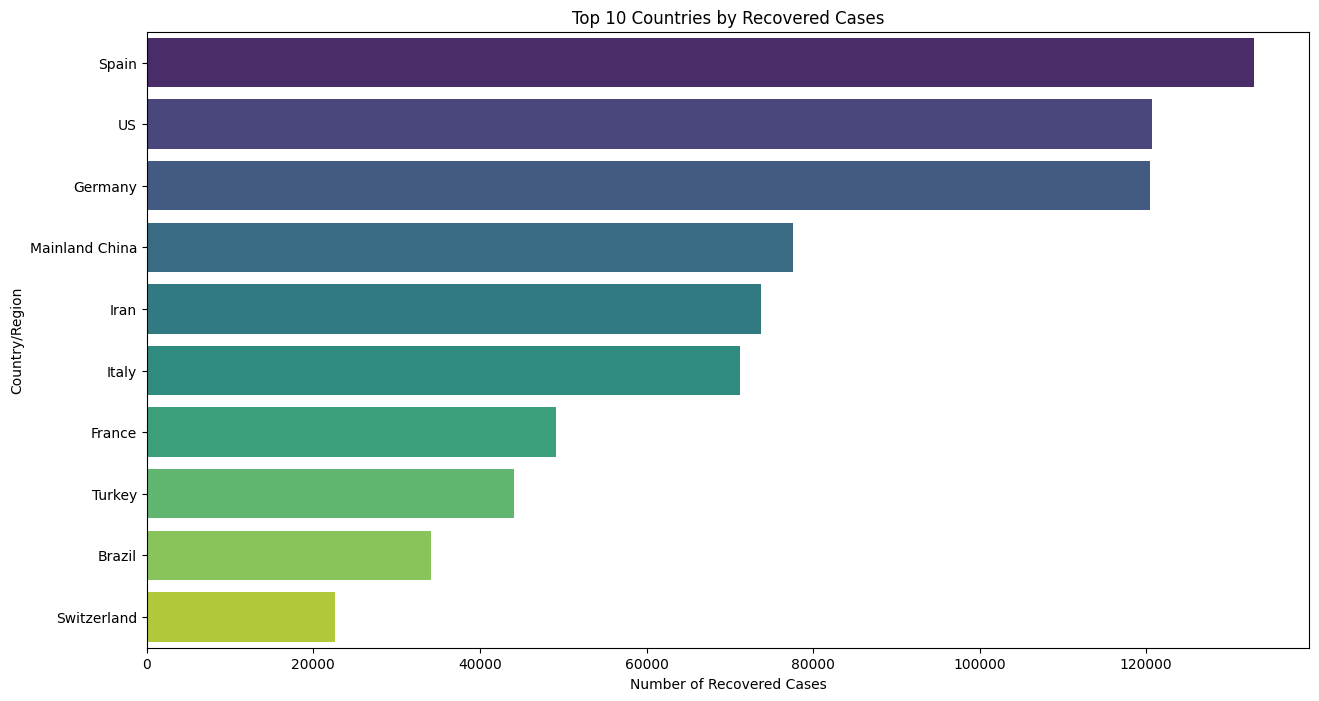

In [53]:
# Plotting the top 10 countries with most recovered cases
plt.figure(figsize=(15, 8))
sns.barplot(x='Recovered', y='Region', data=countries.sort_values(by='Recovered', ascending=False).head(10).reset_index(), palette='viridis')
plt.title('Top 10 Countries by Recovered Cases')
plt.xlabel('Number of Recovered Cases')
plt.ylabel('Country/Region')
plt.show()

This bar plot visualizes the top 10 countries with the highest number of recovered COVID-19 cases, showing which nations have seen the most patient recoveries.

In [51]:
#to check for top 10 countries with most death cases
countries.sort_values(by='Deaths',ascending=False).head(10)

,Confirmed,Deaths,Recovered
Region,,,
US,1039909,60967,120720
Italy,203591,27682,71252
UK,166441,26166,857
Spain,236899,24275,132929
France,166543,24121,49118
Belgium,47859,7501,11283
Germany,161539,6467,120400
Iran,93657,5957,73791
Brazil,79685,5513,34132


/tmp/ipython-input-1156051496.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Deaths', y='Region', data=countries.sort_values(by='Deaths', ascending=False).head(10).reset_index(), palette='viridis')


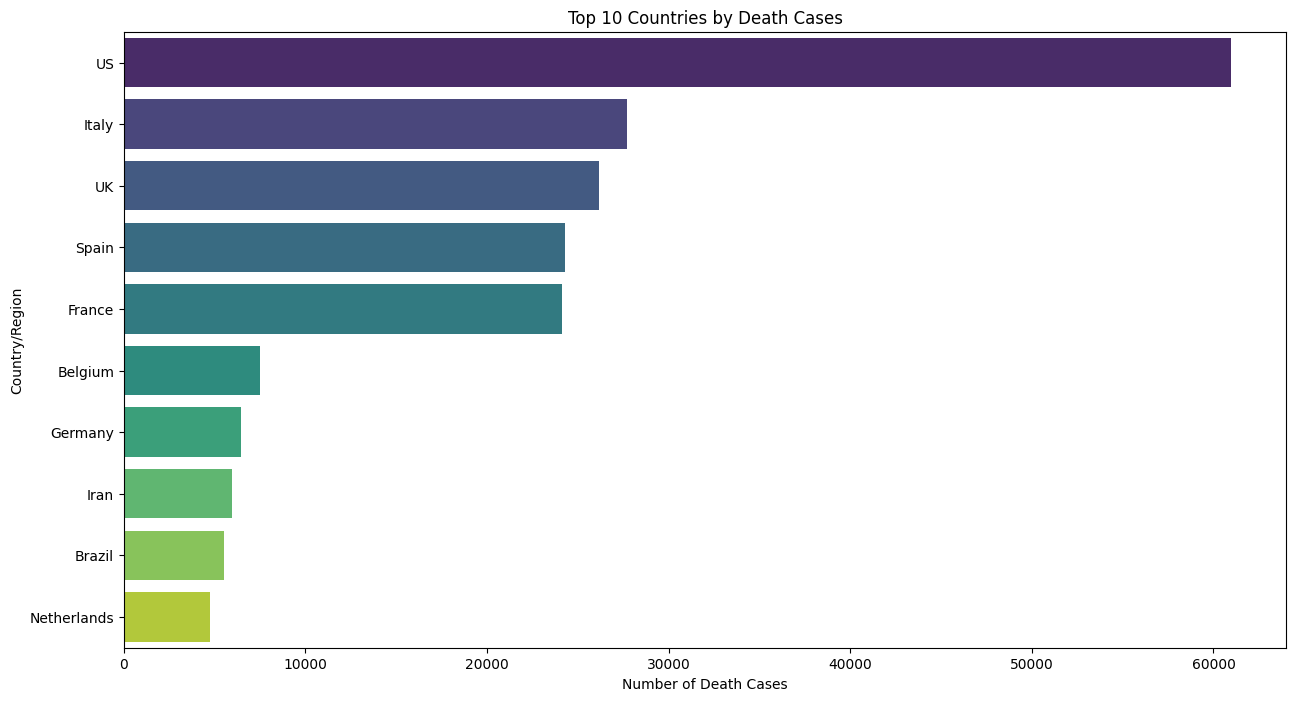

In [52]:
# Plotting the top 10 countries with most death cases
plt.figure(figsize=(15, 8))
sns.barplot(x='Deaths', y='Region', data=countries.sort_values(by='Deaths', ascending=False).head(10).reset_index(), palette='viridis')
plt.title('Top 10 Countries by Death Cases')
plt.xlabel('Number of Death Cases')
plt.ylabel('Country/Region')
plt.show()

This bar plot illustrates the top 10 countries with the highest number of COVID-19 death cases, highlighting the regions most severely impacted by fatalities.


In [56]:
#to check for recovery rate
countries ["Recovery_Rate"] = (countries["Recovered"] / countries["Confirmed"]) * 100
countries

,Confirmed,Deaths,Recovered,Recovery_Rate
Region,,,,
Afghanistan,1939,60,252,12.996390
Albania,766,30,455,59.399478
Algeria,3848,444,1702,44.230769
Andorra,743,42,423,56.931359
Angola,27,2,7,25.925926
...,...,...,...,...
West Bank and Gaza,344,2,71,20.639535
Western Sahara,6,0,5,83.333333
Yemen,6,0,1,16.666667


In [57]:
#to check for mortality rate
countries ["Mortality_Rate"] = (countries["Deaths"] / countries["Confirmed"]) * 100
countries

,Confirmed,Deaths,Recovered,Recovery_Rate,Mortality_Rate
Region,,,,,
Afghanistan,1939,60,252,12.996390,3.094379
Albania,766,30,455,59.399478,3.916449
Algeria,3848,444,1702,44.230769,11.538462
Andorra,743,42,423,56.931359,5.652759
Angola,27,2,7,25.925926,7.407407
...,...,...,...,...,...
West Bank and Gaza,344,2,71,20.639535,0.581395
Western Sahara,6,0,5,83.333333,0.000000
Yemen,6,0,1,16.666667,0.000000


In [59]:
#top 10 countries with higher recovery rate
countries.sort_values(by='Recovery_Rate',ascending=False).head(10)

,Confirmed,Deaths,Recovered,Recovery_Rate,Mortality_Rate
Region,,,,,
Cambodia,122,0,119,97.540984,0.000000
Mainland China,82862,4633,77610,93.661751,5.591224
Mauritius,332,10,306,92.168675,3.012048
Iceland,1797,10,1656,92.153589,0.556483
Diamond Princess,712,13,645,90.589888,1.825843
Thailand,2947,54,2665,90.430947,1.832372
Brunei,138,1,124,89.855072,0.724638
Saint Lucia,17,0,15,88.235294,0.000000
Australia,6752,91,5715,84.641588,1.347749


/tmp/ipython-input-3915081975.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Recovery_Rate', y='Region', data=countries.sort_values(by='Recovery_Rate', ascending=False).head(10).reset_index(), palette='Greens')


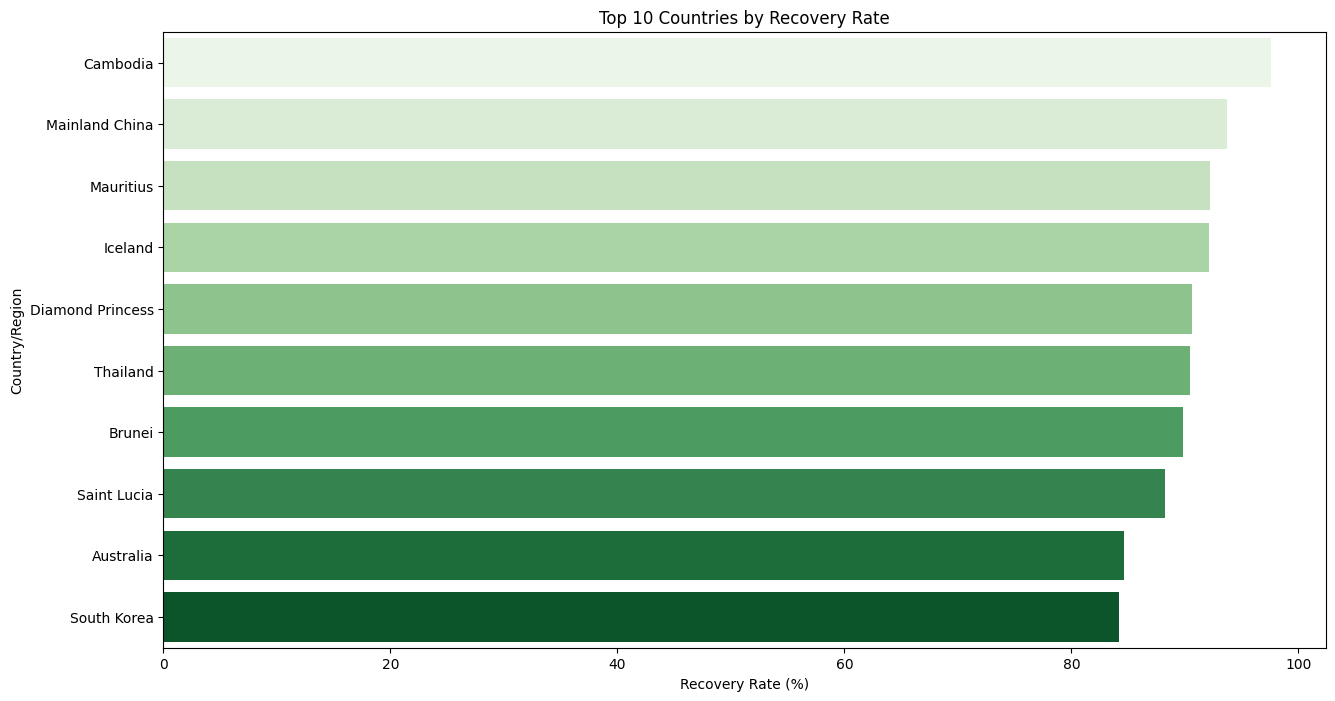

In [61]:
# Plotting the top 10 countries with higher recovery rate
plt.figure(figsize=(15, 8))
sns.barplot(x='Recovery_Rate', y='Region', data=countries.sort_values(by='Recovery_Rate', ascending=False).head(10).reset_index(), palette='Greens')
plt.title('Top 10 Countries by Recovery Rate')
plt.xlabel('Recovery Rate (%)')
plt.ylabel('Country/Region')
plt.show()

This bar plot displays the top 10 countries with the highest COVID-19 recovery rates, indicating successful patient outcomes relative to confirmed cases.

In [ ]:
# Plotting the top 10 countries with higher mortality rate
plt.figure(figsize=(15, 8))
sns.barplot(x='Mortality_Rate', y='Region', data=countries.sort_values(by='Mortality_Rate', ascending=False).head(10).reset_index(), palette='Reds')
plt.title('Top 10 Countries by Mortality Rate')
plt.xlabel('Mortality Rate (%)')
plt.ylabel('Country/Region')
plt.show()

In [60]:
#top 10 countries with higher mortality rate
countries.sort_values(by='Mortality_Rate',ascending=False).head(10)

,Confirmed,Deaths,Recovered,Recovery_Rate,Mortality_Rate
Region,,,,,
Nicaragua,13,3,7,53.846154,23.076923
MS Zaandam,9,2,0,0.000000,22.222222
UK,166441,26166,857,0.514897,15.720886
Belgium,47859,7501,11283,23.575503,15.673123
France,166543,24121,49118,29.492684,14.483347
Bahamas,80,11,23,28.750000,13.750000
Italy,203591,27682,71252,34.997618,13.596868
Zimbabwe,32,4,5,15.625000,12.500000
Mauritania,8,1,6,75.000000,12.500000


/tmp/ipython-input-2751632029.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mortality_Rate', y='Region', data=countries.sort_values(by='Mortality_Rate', ascending=False).head(10).reset_index(), palette='Reds')


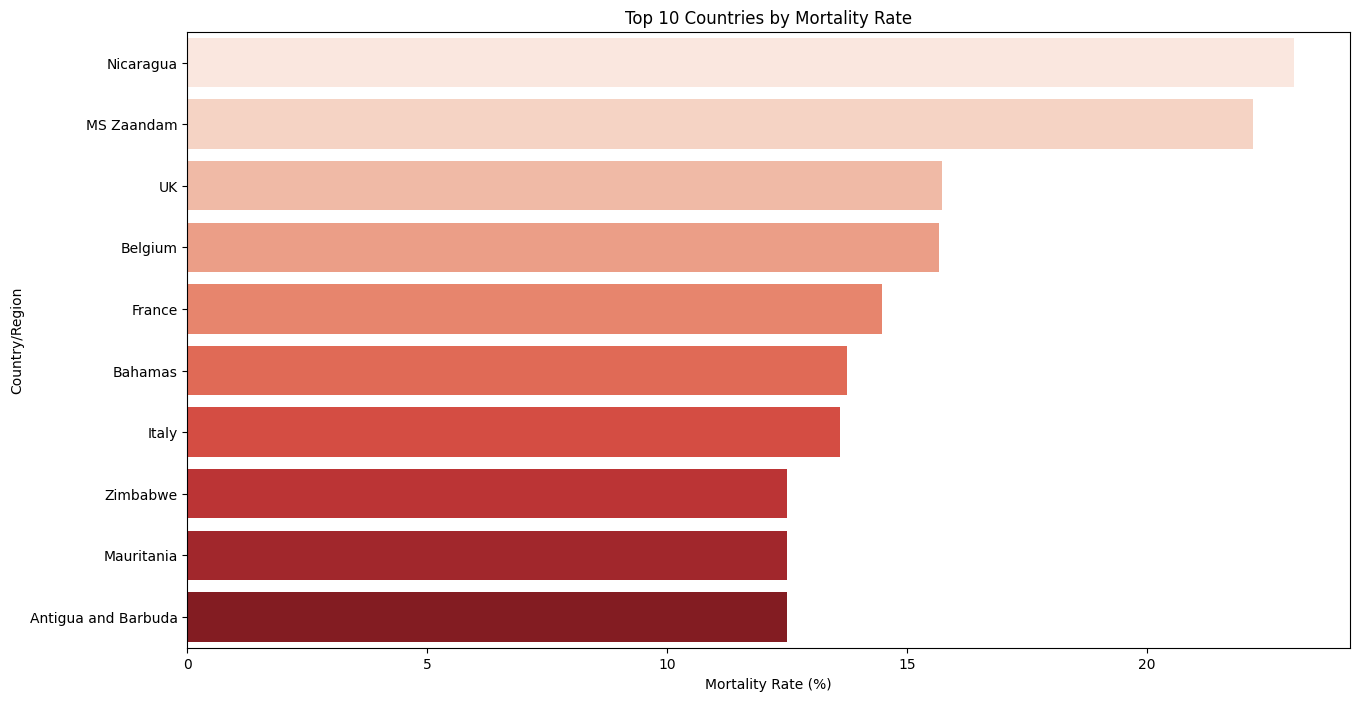

In [62]:
# Plotting the top 10 countries with higher mortality rate
plt.figure(figsize=(15, 8))
sns.barplot(x='Mortality_Rate', y='Region', data=countries.sort_values(by='Mortality_Rate', ascending=False).head(10).reset_index(), palette='Reds')
plt.title('Top 10 Countries by Mortality Rate')
plt.xlabel('Mortality Rate (%)')
plt.ylabel('Country/Region')
plt.show()

This bar plot shows the top 10 countries with the highest COVID-19 mortality rates, highlighting regions where the disease has had a proportionally higher fatal impact.



In [64]:
#in the analysis we are interested in US but it hasnt shown so i want to show it(this helps us to show the exact country we are looking for)
countries[countries.index == 'US']

,Confirmed,Deaths,Recovered,Recovery_Rate,Mortality_Rate
Region,,,,,
US,1039909,60967,120720,11.608708,5.862725


In [66]:
# day with highest confirmed cases
covid.groupby('Date')['Confirmed'].sum().sort_values(ascending=False).head(10)

,Confirmed
Date,
2020-04-29,3193886


In [70]:
covid['Deaths'].max() #highest confirmed deaths in a day

27682

In [73]:
covid['Recovered'].max() #hghest recovery in a day

132929

In [76]:
#countries with no confirmed cases
countries[countries['Confirmed'] == 0]

,Confirmed,Deaths,Recovered,Recovery_Rate,Mortality_Rate
Region,,,,,
